<a href="https://colab.research.google.com/github/atmasuko/Intro-ao-Python/blob/main/Trabalho_Pr%C3%A1tico_Parte_1_Grupo_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalho Prático - Análise Exploratória


**Contextualização:** Hoje é o seu primeiro dia em uma grande multinacional. Sabendo da sua expertise em programação Python e análise de dados, seu coordenador te pede para analisar uma base de dados e apresentar alguns dos insights obtidos. Ele também gostaria de entender um pouco mais sobre programação, então você poderá mostrar algumas das principais tarefas que fez para chegar às conclusões. 

**Objetivo:** O objetivo deste trabalho é praticar alguns dos conceitos vistos em sala de aula. Vocês deverão fazer a coleta de uma base de dados e explorá-la usando os métodos da biblioteca pandas e algumas visualizações.

**Apresentação:** O grupo deverá apresentar utilizando o Jupyter Notebook e terá até 10 minutos para fazer a apresentação. 


**Algumas perguntas que devem ser respondidas:**

* Quantidade de observações totais no conjunto de dados
* Quantidade de observações únicas (visão usuário)
* Quantidade de variaveis no conjunto de dados
* Se existem valores duplicados ou nulos e quantos são

Usem visualizações o maximo de vezes que for possível

**Dicas para uma boa análise exploratória** 

* Faça perguntas aos dados. O que é possível descobrir com essas informações? 
* Procure referências sobre o assunto 
* Não tenha medo de errar! Pode ser que você tenha uma hipótese que não será identificada nesses dados, isso faz parte do processo! 

Datasets disponíveis: 
        
* Covid-19: https://www.kaggle.com/datasets/bobohe/vaccine-tweet-and-mention-network?select=vaccine_original.csv


* Airline Twitter: https://data.world/crowdflower/airline-twitter-sentiment


* Eleições Equador: https://www.kaggle.com/datasets/theworstone/sentimentanalysisecuador2021


* Tokyo Olimpycs: https://www.kaggle.com/datasets/gpreda/tokyo-olympics-2020-tweets


## Em relação a Airline

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/gbam-ds/FinalProject_IntroPython/main/Airline-Sentiment-2-w-AA.csv'
airline = pd.read_csv(url,index_col=0,parse_dates=[0], encoding = "ISO-8859-1")
airline.head() 

,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
_unit_id,,,,,,,,,,,,,,,,,,,
681448150,False,finalized,3,2/25/15 5:24,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2/24/15 11:35,5.703060e+17,NaN,Eastern Time (US & Canada)
681448153,False,finalized,3,2/25/15 1:53,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
681448156,False,finalized,3,2/25/15 10:01,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2/24/15 11:15,5.703010e+17,Lets Play,Central Time (US & Canada)
681448158,False,finalized,3,2/25/15 3:05,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2/24/15 11:15,5.703010e+17,NaN,Pacific Time (US & Canada)
681448159,False,finalized,3,2/25/15 5:50,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2/24/15 11:14,5.703010e+17,NaN,Pacific Time (US & Canada)


In [ ]:
#qtd de observações totais e únicas
airline.shape

(14640, 20)

In [ ]:
#conhecendo as variáveis
airline.dtypes

_unit_id                          int64
_golden                            bool
_unit_state                      object
_trusted_judgments                int64
_last_judgment_at                object
airline_sentiment                object
airline_sentiment:confidence    float64
negativereason                   object
negativereason:confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_id                        float64
tweet_location                   object
user_timezone                    object
dtype: object

In [ ]:
#nulo
print(airline.isnull().sum().sort_values(ascending = False))

negativereason_gold             14608
airline_sentiment_gold          14600
tweet_coord                     13621
negativereason                   5462
user_timezone                    4820
tweet_location                   4733
negativereason:confidence        4118
_last_judgment_at                  56
airline_sentiment                   0
airline_sentiment:confidence        0
airline                             0
_golden                             0
name                                0
_trusted_judgments                  0
retweet_count                       0
text                                0
_unit_state                         0
tweet_created                       0
tweet_id                            0
_unit_id                            0
dtype: int64


In [ ]:
#duplicado
airline[airline.duplicated()]

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,airline_sentiment,airline_sentiment:confidence,negativereason,negativereason:confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone


Nao temos duplicados

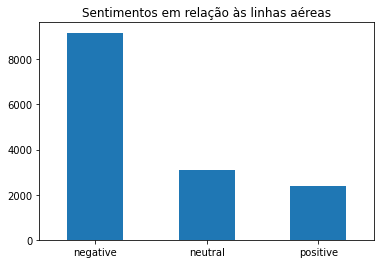

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9c4c0e1f90>,
 (array([0, 1, 2]), <a list of 3 Text major ticklabel objects>),
 Text(0.5, 1.0, 'Sentimentos em relação às linhas aéreas'),
 None)

In [ ]:
import matplotlib.pyplot as plt

cont = airline['airline_sentiment'].value_counts()
cont.plot(kind='bar'), plt.xticks(rotation = 360), plt.title('Sentimentos em relação às linhas aéreas'), plt.show()

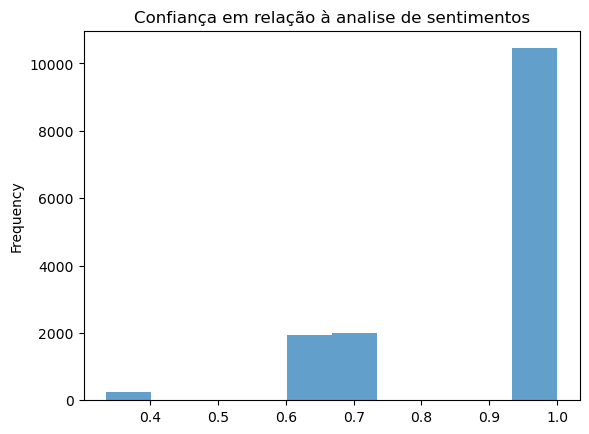

(Text(0.5, 1.0, 'Confiança em relação à analise de sentimentos'), None)

In [ ]:
airline['airline_sentiment:confidence'].plot.hist(alpha=0.7);
plt.title('Confiança em relação à analise de sentimentos'), plt.show()

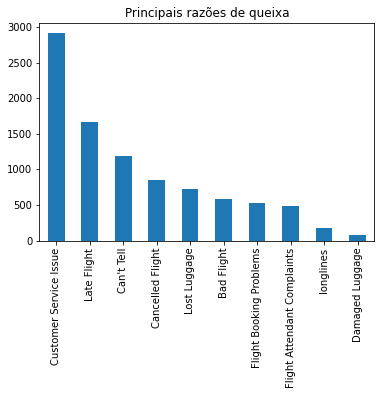

(Text(0.5, 1.0, 'Principais razões de queixa'), None)

In [ ]:
cont = airline['negativereason'].value_counts()
cont.plot(kind='bar')
plt.title('Principais razões de queixa'), plt.show()


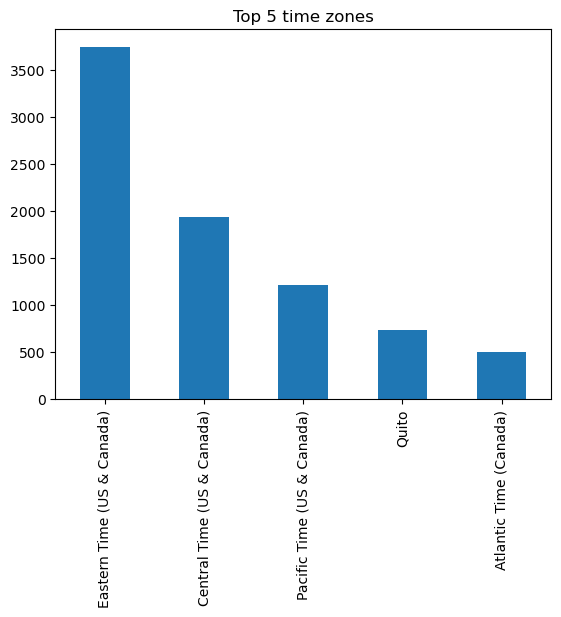

(Text(0.5, 1.0, 'Top 5 time zones'), None)

In [ ]:
cont = airline['user_timezone'].value_counts()[:5]
cont.plot(kind='bar')
plt.title('Top 5 time zones'), plt.show()

Testaremos agora a seguinte hipótese: 

Posts com teor negativo são, em geral, mais retweetados do que posts com teor positivo?

Será verdade que indivíduos tendem a se mobilizar mais quando estão perdendo do que quando estão se beneficiando de algo?

In [74]:
# Queremos analisar se tweets com teor negativo são mais compartilhados, em geral
negative = airline[(airline.airline_sentiment == "negative")]
y = statistics.mean(negative["retweet_count"])
print("A média de retweets para cada tweet negativo é:", y)

A média de retweets para cada tweet negativo é: 0.09337546306384834


In [75]:
positive = airline[(airline.airline_sentiment == "positive")]
x = statistics.mean(positive["retweet_count"])
print("A média de retweets para cada tweet positivo é:", x)


A média de retweets para cada tweet positivo é: 0.06940330088870081


In [76]:
data = {'Tipo': ['Positivo', 'Negativo'],
        'Média de Retweets': [x, y]}
data = pd.DataFrame(data)
data        

,Tipo,Média de Retweets
0,Positivo,0.069403
1,Negativo,0.093375


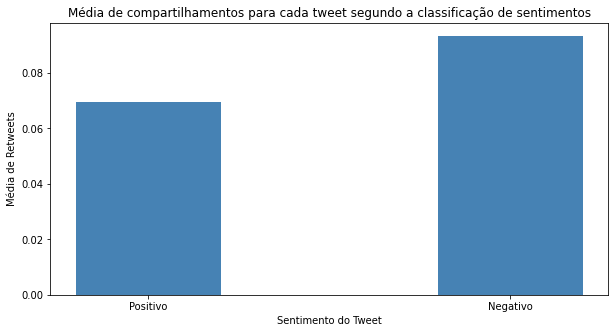

In [82]:
data = {'Positivo':x, 'Negativo':y}
retweets = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(retweets, values, color ='steelblue',
        width = 0.4)
 
plt.xlabel("Sentimento do Tweet")
plt.ylabel("Média de Retweets")
plt.title("Média de compartilhamentos para cada tweet segundo a classificação de sentimentos")
plt.show()

A análise feita acima permite observar que os tweets classificados como "negativos" são, em média, mais compartilhados do que os tweets com teor de conteúdo considerado "positivo". Isso corrobora a hipótese segundo a qual usuários, em geral, possuem mais propensidade a se mobilizarem quando estão perdendo ou sendo prejudicados do que quando estão ganhando ou se beneficiando de algum fator.

In [ ]:
from textblob import TextBlob,Word

def polarity(x):
  try:
      return TextBlob(x).sentiment[0]
  except:
        return 9

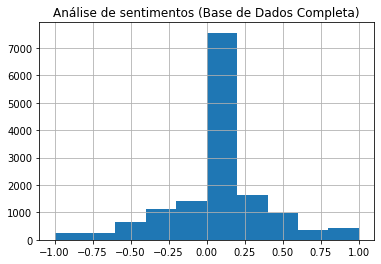

A média da análise de sentimos é: 0.048857191173908146


In [61]:
sentiments = airline["text"].apply(lambda x: polarity(x))
sentiments.hist();
plt.title('Análise de sentimentos (Base de Dados Completa)'), plt.show()
import statistics
x = statistics.mean(sentiments)
print("A média da análise de sentimos é:", x)

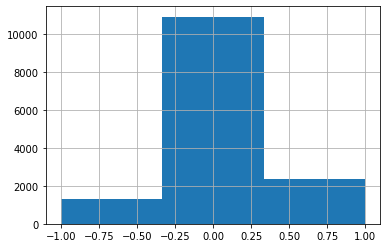

In [40]:
sentiments = airline["text"].apply(lambda x: polarity(x))
sentiments.hist(bins=3);

In [ ]:
import matplotlib.pyplot as plt

Resultados diferentes: mais neutros, mais positivos. Intuitivamente, o encontrado anterior faz mais sentido...

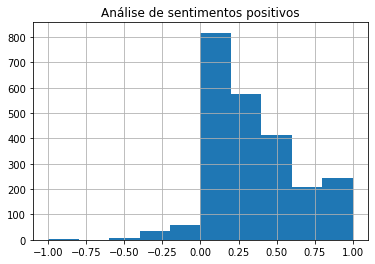

A média da análise de sentimentos positivos é: 0.3314143141299683


In [60]:
# testando a robustez e eficiência do algoritmo de análise de sentimentos

# filtrando somente os tweets originalmente considerados positivos
positive = airline[(airline.airline_sentiment == "positive")]

# aplicando a análise de sentimentos
sentiments = positive["text"].apply(lambda x: polarity(x))
sentiments.hist();
plt.title('Análise de sentimentos positivos'), plt.show()

import statistics
x = statistics.mean(sentiments)
print("A média da análise de sentimentos positivos é:", x)

A maior parte da distribuição está concentrada na direita.

O gráfico acima, portanto, permite identificar que a maior parte dos tweets classificados originamente como positivos também tende a ser considerada positiva pela análise de sentimentos.



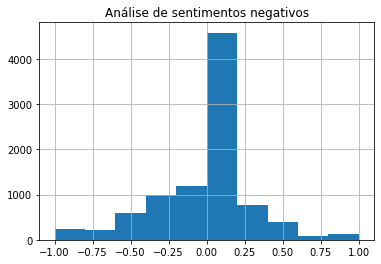

A média da análise de sentimentos negativos é: -0.03572761606203103


In [62]:
# testando a robustez e eficiência do algoritmo

# filtrando somente os tweets originalmente considerados negativos
negative = airline[(airline.airline_sentiment == "negative")]

# aplicando a análise de sentimentos
sentiments = negative["text"].apply(lambda x: polarity(x))
sentiments.hist();
plt.title('Análise de sentimentos negativos'), plt.show()
import statistics
x = statistics.mean(sentiments)
print("A média da análise de sentimentos negativos é:", x)

# eficiência aparentemente menor se comparada aos sentimentos positivos

A média aritmética para os tweets negativos é menor do que zero. Isso indica que, na média, tweets originalmente classificados como negativos também foram considerados negativos pela nossa análise de sentimentos.

No entanto, o histograma acima evidencia que alguns valores estão acima de 0.5 e portanto seriam considerados "positivos" pela nossa análise de sentimentos, o que contradiz a classificação original ("negativa").

Para tentar entender por que isso aconteceu, primeiro vamos filtrar os tweets originalmente classificados como positivos mas que tiveram valor negativo em nossa análise de sentimentos.

De forma análoga, faremos uma segunda análise na qual filtraremos os tweets originalmente classificados como negativos mas que tiveram valor positivo em nossa análise de sentimentos.

In [64]:
# filtrando somente tweets classificados como positivos
positive = airline[(airline.airline_sentiment == "positive")]

# efetuando a análise de sentimentos
sentiments = positive["text"].apply(lambda x: polarity(x))

# concatenando a análise de sentimentos com a base de dados original
df = pd.merge(positive, sentiments, on = '_unit_id')

# renomeando a coluna de sentimentos e texto para evitar confusão
df = df.rename(columns={'text_y': 'sentiment', 'text_x': 'text'})

# filtrando tweets com análise de sentimentos negativa
filtered = df[df['sentiment'] < 0]
data = filtered[["text", "airline_sentiment", "sentiment"]]
data

,text,airline_sentiment,sentiment
_unit_id,,,
681448404,@VirginAmerica come back to #PHL already. We n...,positive,-0.533333
681448621,@VirginAmerica twitter team. you guys killed i...,positive,-0.250000
681448793,@VirginAmerica I mean. Probably inappropriate ...,positive,-0.390625
681448851,@VirginAmerica of course! I work for @VirginAt...,positive,-0.250000
681448921,"@VirginAmerica , am I dreaming? Did you really...",positive,-0.028125
...,...,...,...
681678730,@AmericanAir Eventually the call got through. ...,positive,-0.312500
681679120,@AmericanAir Shout-out to all the ground crews...,positive,-0.172222
681679495,@AmericanAir flights have been on time Late Fl...,positive,-0.375000



Repare que no tweet "ID 681448621" (segunda linha da tabela acima), o usuário escreveu a palavra "killed", o que gerou uma ambiguidade.

Essa palavra pode ser interpretada de diferentes modos a depender do contexto.

Que pode ser positivo, exemplo: "you guys killed it!";("vocês arrasaram!")

Ou negativo. Exemplo: "You killed my plans!"; ("vocês destruíram meus planos!")

Provavelmente, esta ambiguidade semântica causou divergências entre a classificação original da base e aquela feita pelo algoritmo.

Além disso, note que o tweet ID 681679688 (penúltima linha da tabela acima) apresenta a junção de palavras positivas com negativas ("mad" - que significa "raivoso, enfurecido", com a palavra "love", que é "amor" em português.)

Ao que tudo indica, a mescla entre palavras de conotação positiva e negativa em uma mesma sentença (neste caso, "mad love"), provavelmente causou a divergência entre a classificação original do sentimento e a análise feita pelo algoritmo.

In [65]:
# filtrando os tweets classificados como negativos
negative = airline[(airline.airline_sentiment == "negative")]

# aplicando a análise de sentimentos
sentiments = negative["text"].apply(lambda x: polarity(x))

# concatenando a análise de sentimentos com a base original
df = pd.merge(negative, sentiments, on = '_unit_id')

# renomeando a coluna de sentimentos e texto para evitar confusão
df = df.rename(columns={'text_y': 'sentiment', 'text_x': 'text'})

# agora vamos ver quais tweets foram originalmente classificados como negativos mas nosso algoritmo considera-os como positivos

# Aqui, partimos de pressuposto que os tweets maiores ou iguais a 0.5 são positivos

# filtrando os tweets com análise de sentimentos maior do que 0.5
filt = df[df['sentiment'] > 0.5]
data = filt[["text", "airline_sentiment", "sentiment"]]
data

,text,airline_sentiment,sentiment
_unit_id,,,
681448387,@VirginAmerica called your service line and wa...,negative,1.000000
681448774,@VirginAmerica husband and I ordered three dri...,negative,1.000000
681449024,@United the internet is a great thing. I am e...,negative,0.800000
681449085,"@united I just sent an email to Customer Care,...",negative,0.781250
681449259,"@united yes, but still now answers. Many have ...",negative,0.976562
...,...,...,...
681679714,@AmericanAir fix the engine of flight AA3031so...,negative,0.800000
681679722,@AmericanAir All flts to JFK Cancelled Flightl...,negative,1.000000
681679725,@AmericanAir i was also told by agents my issu...,negative,0.813802


Repare que o tweet de ID 681449259 (quinta linha da tabela acima) possui a seguinte sentença: " yes, but still now answers."

Aparentemente, o próprio usuário cometeu um typo ao publicar o seu tweet. O usuário, nesse sentido, acabou escrevendo "now" ao invés de "no answers" ("sem respostas", em português), o que sinaliza uma reclamação direcionada à companhia aérea.

Ao que tudo indica, isso fez com que o algoritmo retornasse um valor positivo, ainda que a frase possua, originalmente, uma conotação negativa.

Portanto, podemos dizer que eventuais typos tendem a interferir na eficiência da análise de sentimentos.